In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Data Preprocessing**

In [ ]:
path='/content/drive/MyDrive/Output_sunflower.xlsx'
df = pd.read_excel(path)

In [ ]:
df

,Region,farm,mean soil depth,year sowing,cultivar,sowing,anthesis,biomass kg/ha,yield kg/ha,irrigation,rain,rain fallow,N applied,Tmax,Tmin,Rs,farm production (kg)
0,LOBA,1,1.57,2001,A353,2001074,2001153,10339,3173,100,225,235,100,26.95234,13.02476,23.19487,66632
1,LOBA,1,1.57,2002,A353,2002074,2002154,8849,1944,100,182,191,100,26.64486,12.84393,22.83785,40821
2,LOBA,1,1.57,2003,A353,2003074,2003152,4813,803,100,74,90,100,27.74393,13.48598,22.79158,16853
3,LOBA,1,1.57,2004,A353,2004074,2004157,12499,4074,100,243,308,100,27.68084,12.85047,23.24158,85564
4,LOBA,1,1.57,2005,A353,2005074,2005151,7543,1588,100,163,172,100,28.80514,13.10467,23.34719,33355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,CSCS,62,0.67,2016,SW101,2016075,2016147,7911,1827,50,172,94,50,26.48310,14.89108,21.09201,54813
1236,CSCS,62,0.67,2017,SW101,2017075,2017144,8673,2871,50,128,416,50,27.06526,14.94413,20.83380,86143
1237,CSCS,62,0.67,2018,SW101,2018075,2018147,6313,3147,50,328,76,50,26.70189,15.35164,20.76478,94404
1238,CSCS,62,0.67,2019,SW101,2019075,2019154,9327,2783,50,180,228,50,26.59389,14.99155,21.04272,83480


In [ ]:
def data_quality_report(df):

    if isinstance(df, pd.core.frame.DataFrame):

        descriptive_statistics = df.describe(include = 'all')
        data_types = pd.DataFrame(df.dtypes, columns=['Data Type']).transpose()
        missing_value_counts = pd.DataFrame(df.isnull().sum(), columns=['Missing Values']).transpose()
        present_value_counts = pd.DataFrame(df.count(), columns=['Present Values']).transpose()
        data_report = pd.concat([descriptive_statistics, data_types, missing_value_counts, present_value_counts], axis=0)

        return data_report

    else:

        return None

# **Data Cleaning and EDA**

In [ ]:
final_dataset = df.drop(['Region', 'farm', 'year sowing', 'cultivar', 'anthesis', 'N applied', 'sowing', 'rain fallow'], axis=1)

In [ ]:
final_dataset

,mean soil depth,biomass kg/ha,yield kg/ha,irrigation,rain,Tmax,Tmin,Rs,farm production (kg)
0,1.57,10339,3173,100,225,26.95234,13.02476,23.19487,66632
1,1.57,8849,1944,100,182,26.64486,12.84393,22.83785,40821
2,1.57,4813,803,100,74,27.74393,13.48598,22.79158,16853
3,1.57,12499,4074,100,243,27.68084,12.85047,23.24158,85564
4,1.57,7543,1588,100,163,28.80514,13.10467,23.34719,33355
...,...,...,...,...,...,...,...,...,...
1235,0.67,7911,1827,50,172,26.48310,14.89108,21.09201,54813
1236,0.67,8673,2871,50,128,27.06526,14.94413,20.83380,86143
1237,0.67,6313,3147,50,328,26.70189,15.35164,20.76478,94404
1238,0.67,9327,2783,50,180,26.59389,14.99155,21.04272,83480


In [ ]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mean soil depth        1240 non-null   float64
 1   biomass kg/ha          1240 non-null   int64  
 2   yield kg/ha            1240 non-null   int64  
 3   irrigation             1240 non-null   int64  
 4   rain                   1240 non-null   int64  
 5   Tmax                   1240 non-null   float64
 6   Tmin                   1240 non-null   float64
 7   Rs                     1240 non-null   float64
 8    farm production (kg)  1240 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 87.3 KB


In [ ]:
final_dataset.isnull().sum()

mean soil depth          0
biomass kg/ha            0
yield kg/ha              0
irrigation               0
rain                     0
Tmax                     0
Tmin                     0
Rs                       0
 farm production (kg)    0
dtype: int64

In [ ]:
for col in final_dataset.columns:
  print(col)

mean soil depth
biomass kg/ha
yield kg/ha
irrigation
rain
Tmax
Tmin
Rs
 farm production (kg)


In [ ]:
final_dataset.rename(columns={" farm production (kg)": "farm_prod"}, inplace=True)

In [ ]:
#Detecting special characters
import re
def detect_special_character(pass_string):
  regex= re.compile('[@_!#$%^&*()<>?/\|}{~:-]')
  if(regex.search(pass_string) == None):
    res = False
  else:
    res = True
  return(res)
for col in final_dataset.columns:
  for i in col:
    if detect_special_character(i)== True:
      spc_char = i
      print(i)
    else:
      continue

/
/
_


**Data Visualisations**

In [ ]:
data_quality_report(final_dataset)

,mean soil depth,biomass kg/ha,yield kg/ha,irrigation,rain,Tmax,Tmin,Rs,farm_prod
count,1240.0,1240.0,1240.0,1240.0,1240.0,1240.0,1240.0,1240.0,1240.0
mean,1.050323,6209.358065,1484.097581,31.451613,237.604839,28.744809,13.474462,22.938166,38583.251613
std,0.330744,2809.916068,1167.191014,33.894237,96.305936,1.7594,1.332874,1.673432,29656.619647
min,0.59,543.0,20.0,0.0,74.0,24.52599,10.29391,18.85947,545.0
25%,0.79,3988.5,433.0,0.0,164.0,27.47803,12.45421,21.82008,12957.75
50%,0.955,6279.0,1212.5,50.0,233.0,28.92477,13.43046,23.3,33186.5
75%,1.41,8373.75,2369.0,50.0,298.0,29.96612,14.4978,24.13334,59854.25
max,1.68,12815.0,5198.0,100.0,517.0,33.27867,16.56396,26.6093,171823.0
Data Type,float64,int64,int64,int64,int64,float64,float64,float64,int64
Missing Values,0,0,0,0,0,0,0,0,0


In [ ]:
corr = final_dataset.corr()
corr

,mean soil depth,biomass kg/ha,yield kg/ha,irrigation,rain,Tmax,Tmin,Rs,farm_prod
mean soil depth,1.000000,0.472335,0.358584,0.453392,-0.135654,0.227689,0.032965,0.194118,0.203810
biomass kg/ha,0.472335,1.000000,0.856614,0.556612,0.341133,-0.293210,0.316205,-0.334915,0.810993
yield kg/ha,0.358584,0.856614,1.000000,0.650248,0.270851,-0.382812,0.377024,-0.436195,0.904749
irrigation,0.453392,0.556612,0.650248,1.000000,-0.029161,-0.430902,0.174374,-0.189306,0.402416
rain,-0.135654,0.341133,0.270851,-0.029161,1.000000,-0.357901,0.305004,-0.382816,0.358954
Tmax,0.227689,-0.293210,-0.382812,-0.430902,-0.357901,1.000000,-0.146904,0.585973,-0.288018
Tmin,0.032965,0.316205,0.377024,0.174374,0.305004,-0.146904,1.000000,-0.554023,0.484584
Rs,0.194118,-0.334915,-0.436195,-0.189306,-0.382816,0.585973,-0.554023,1.000000,-0.516861
farm_prod,0.203810,0.810993,0.904749,0.402416,0.358954,-0.288018,0.484584,-0.516861,1.000000


<Axes: >

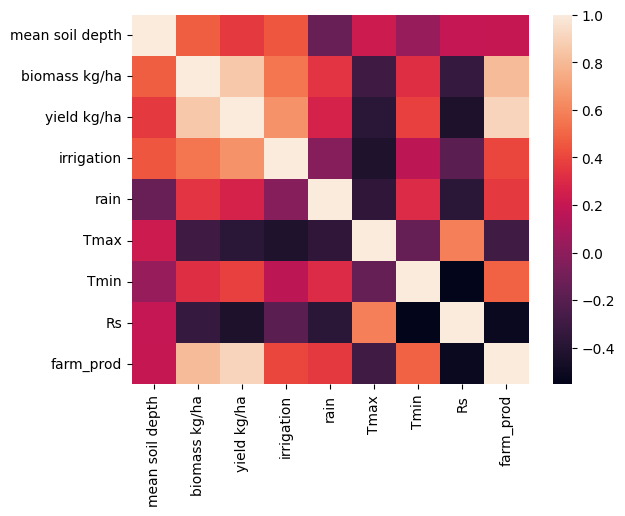

In [ ]:
sns.heatmap(corr)

<Axes: xlabel='Tmax', ylabel='yield kg/ha'>

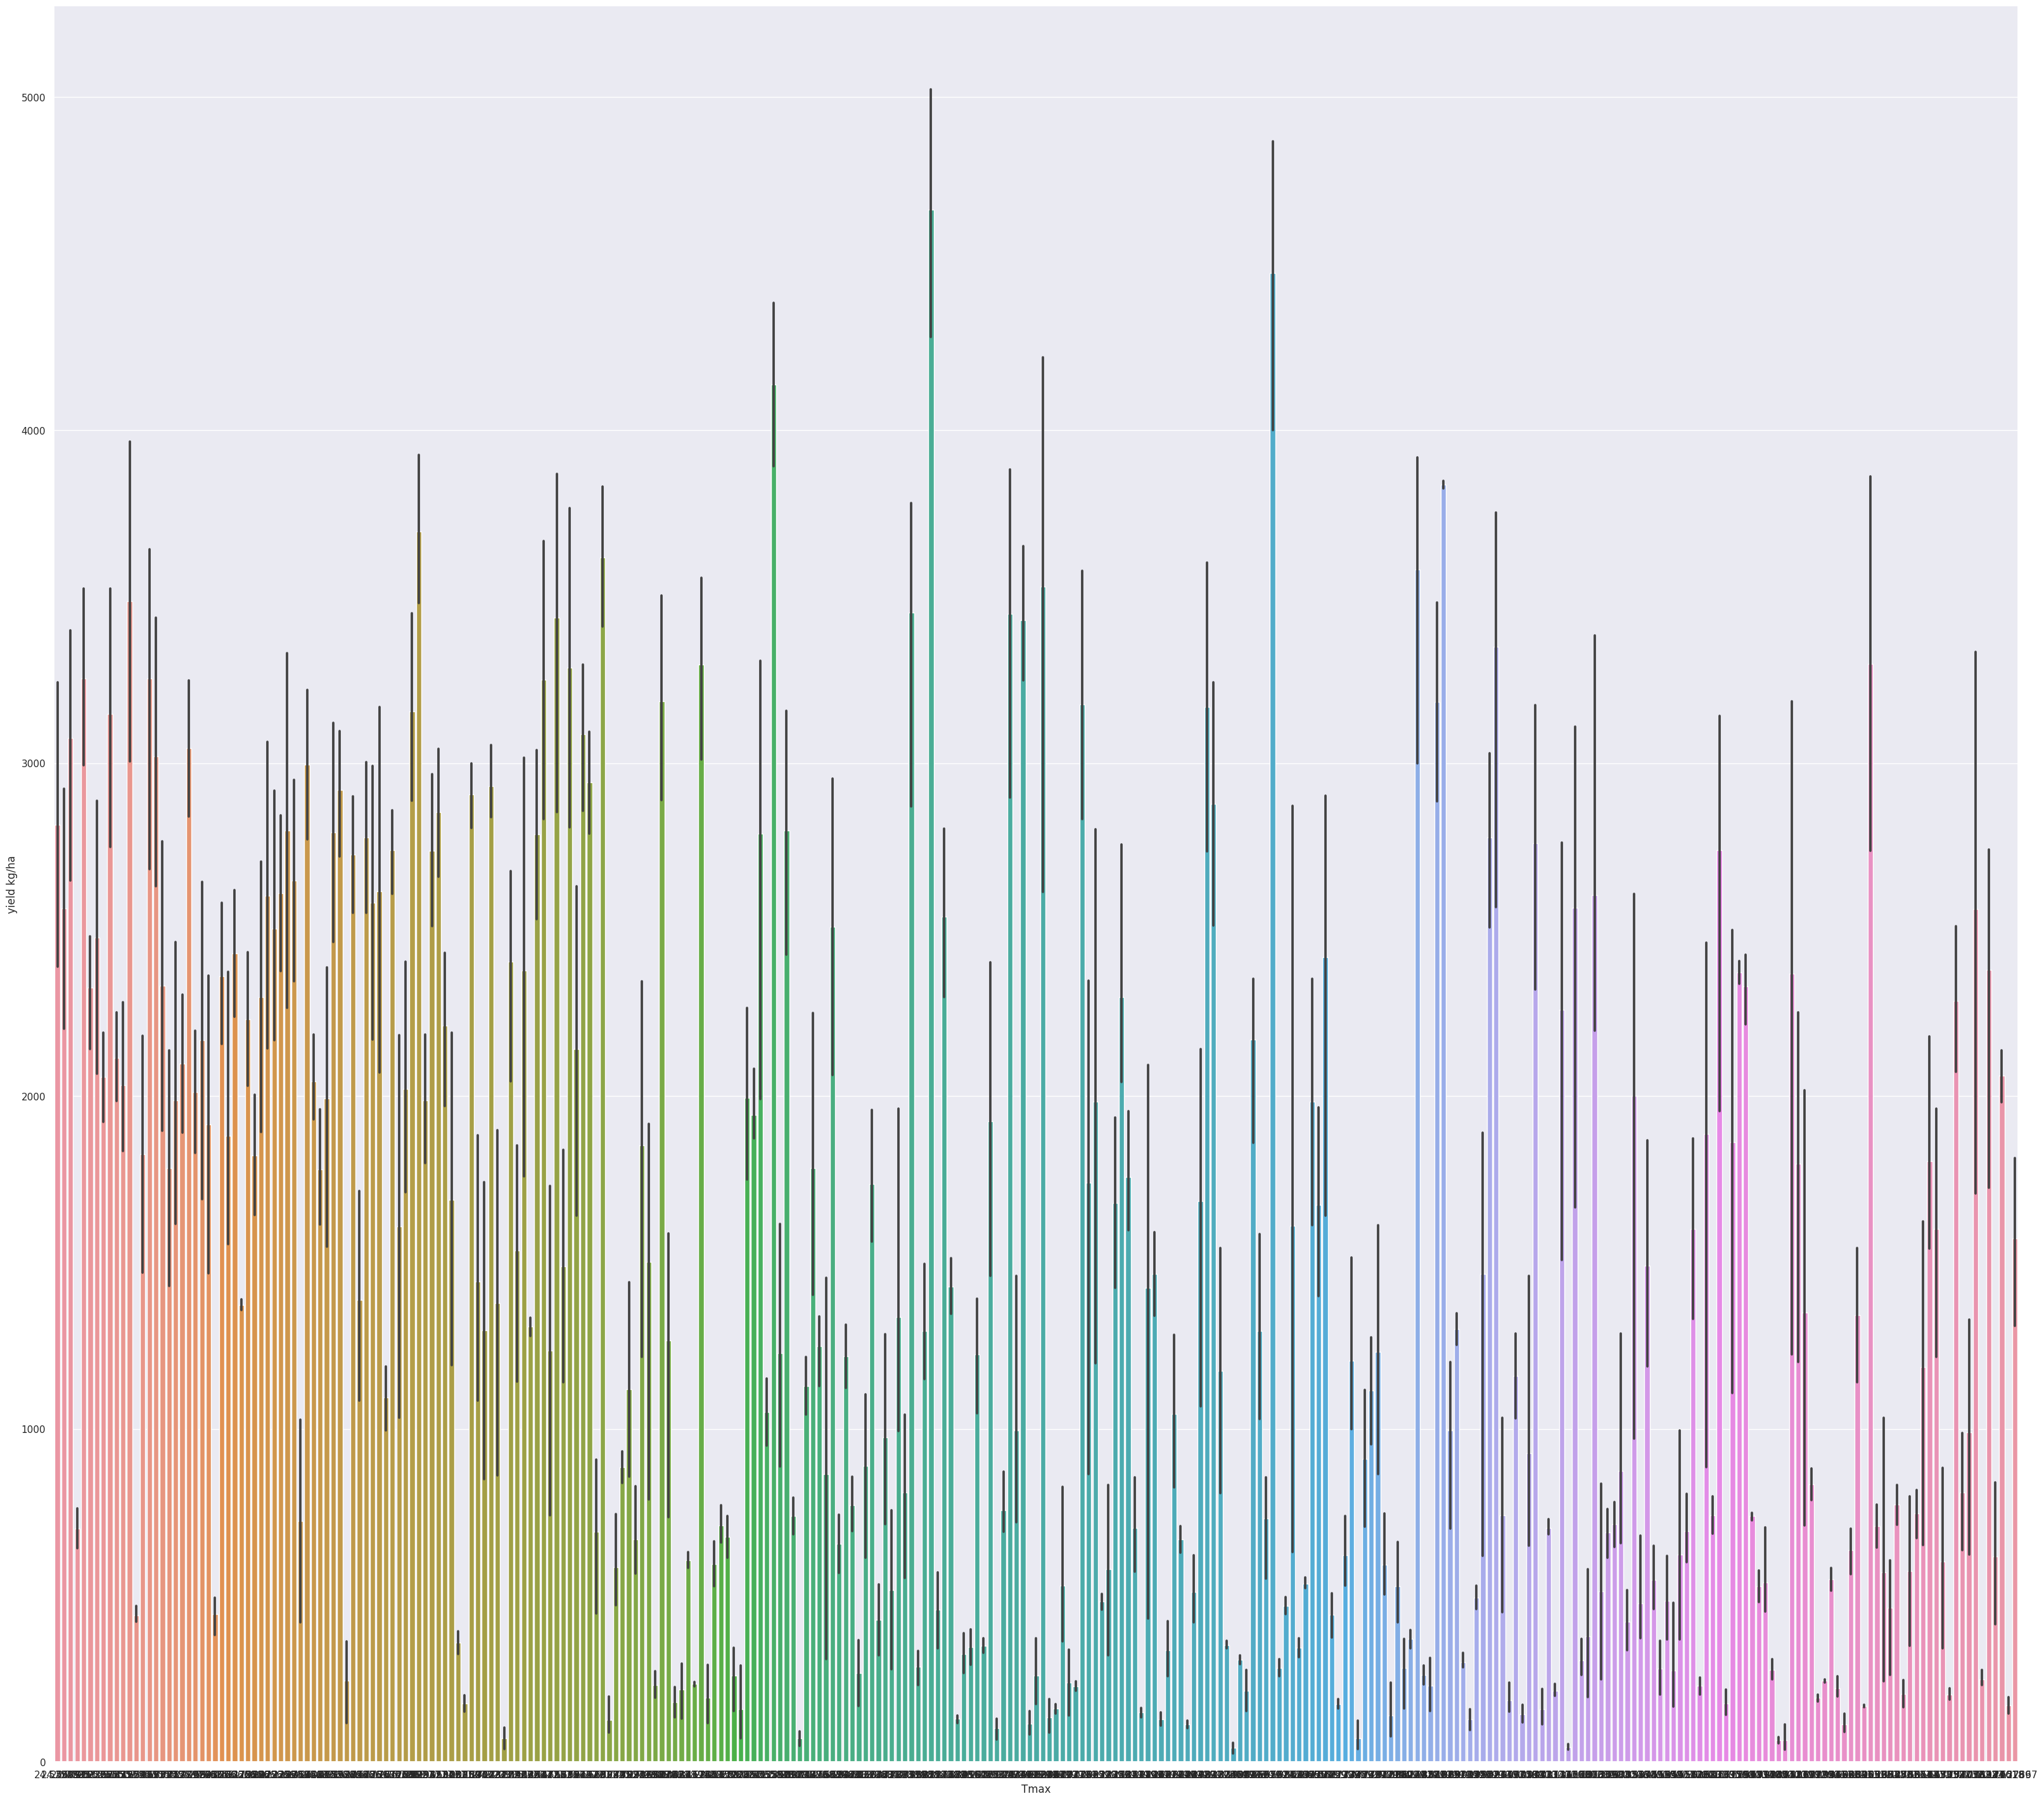

In [ ]:
sns.set(rc={"figure.figsize":(40,36)})
sns.barplot(x="Tmax", y="yield kg/ha", data=final_dataset)

<Axes: xlabel='Tmax', ylabel='yield kg/ha'>

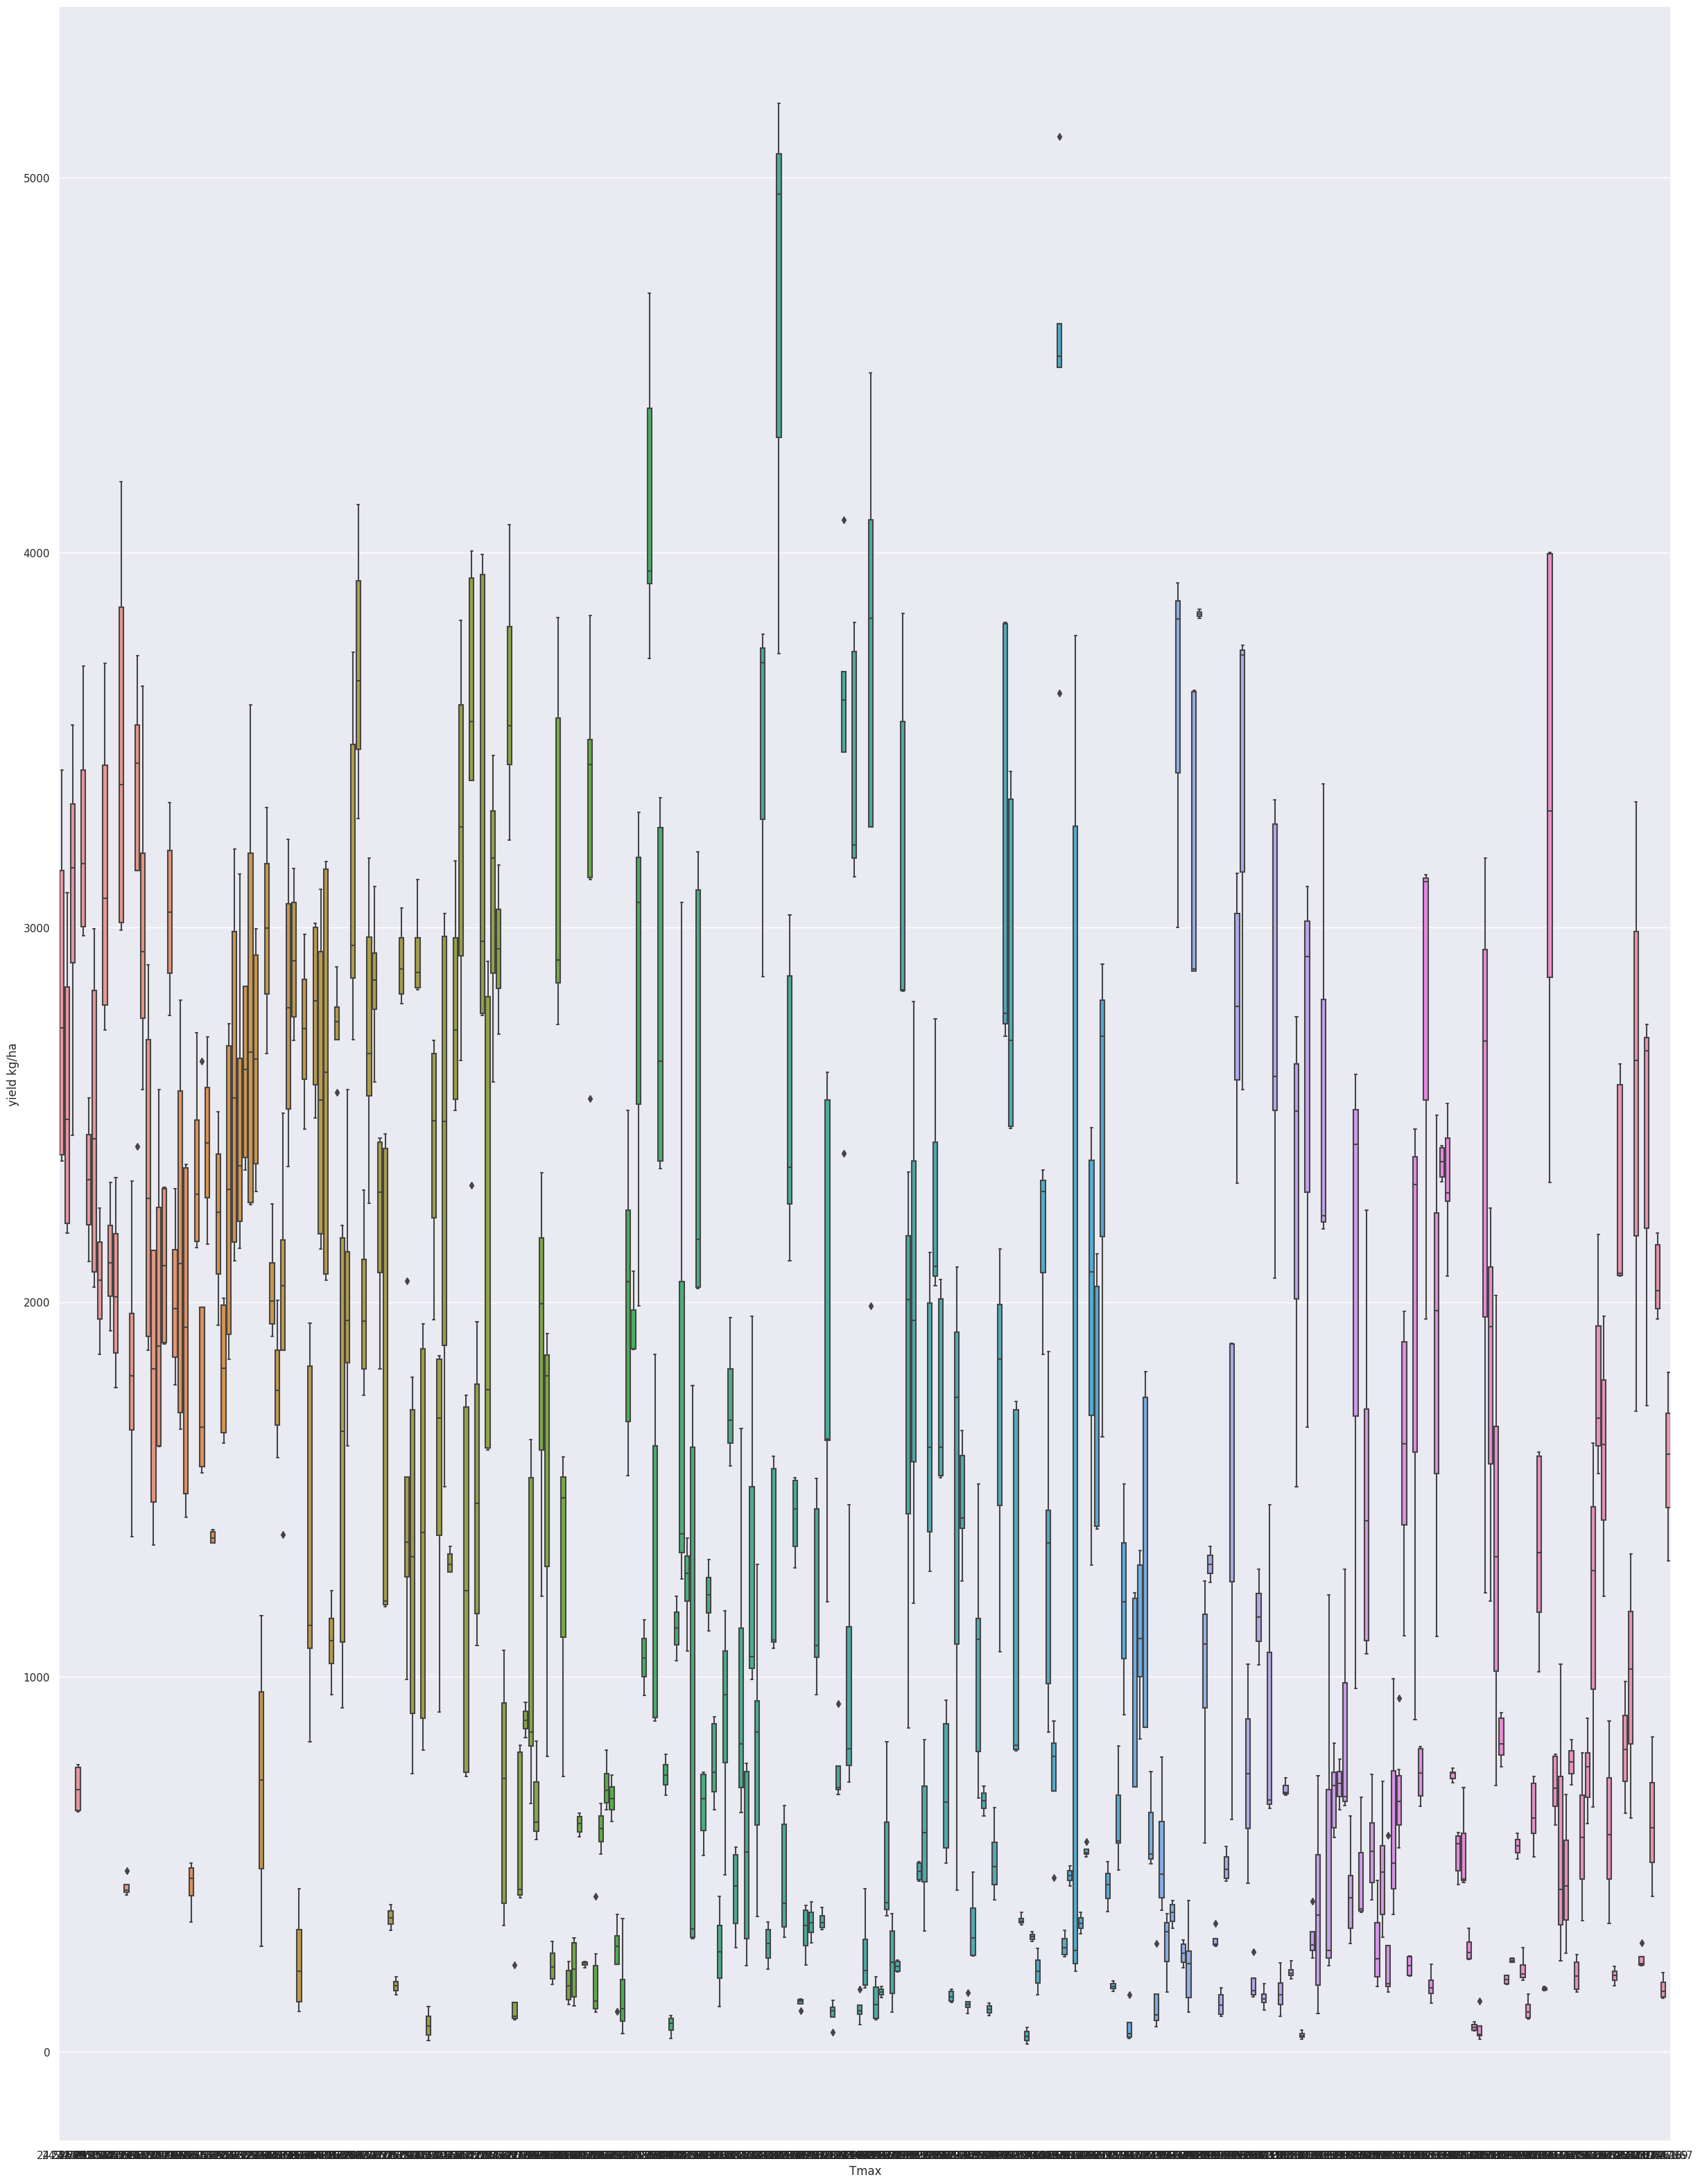

In [ ]:
sns.set(rc={"figure.figsize":(30,40)})
sns.boxplot(x="Tmax", y="yield kg/ha", data=final_dataset)

In [ ]:
from sklearn.model_selection import train_test_split
X = final_dataset.drop(['yield kg/ha', "farm_prod", 'Rs', 'biomass kg/ha'], axis=1)
y = final_dataset[["yield kg/ha"]]

<Axes: ylabel='Density'>

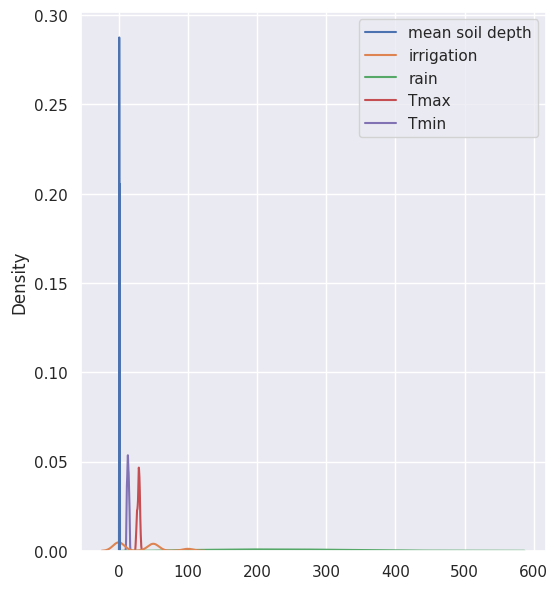

In [ ]:
sns.set(rc={"figure.figsize":(6,7)})
sns.kdeplot(data=X)

In [ ]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

<Axes: ylabel='Density'>

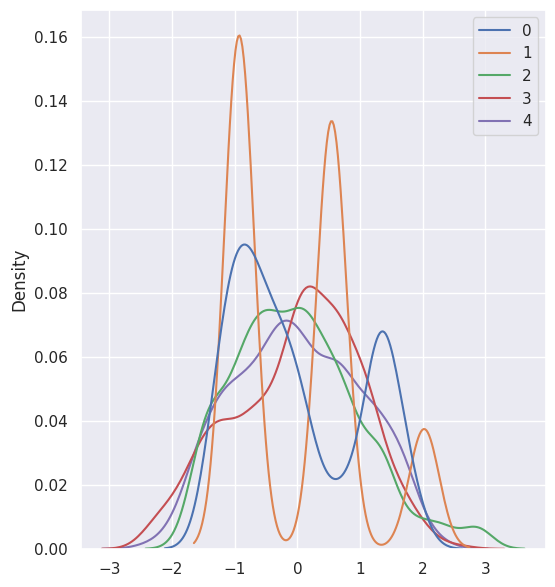

In [ ]:
scaled_X = scaler.transform(X)
sns.kdeplot(data=scaled_X)

<Axes: ylabel='Density'>

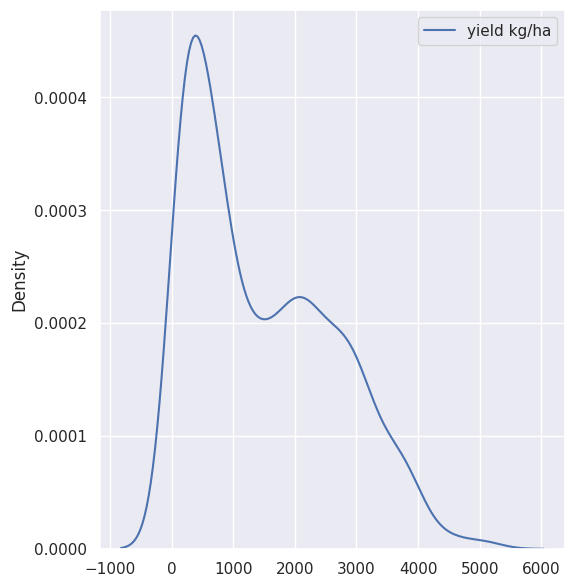

In [ ]:
sns.kdeplot(data = y)

<Axes: ylabel='Density'>

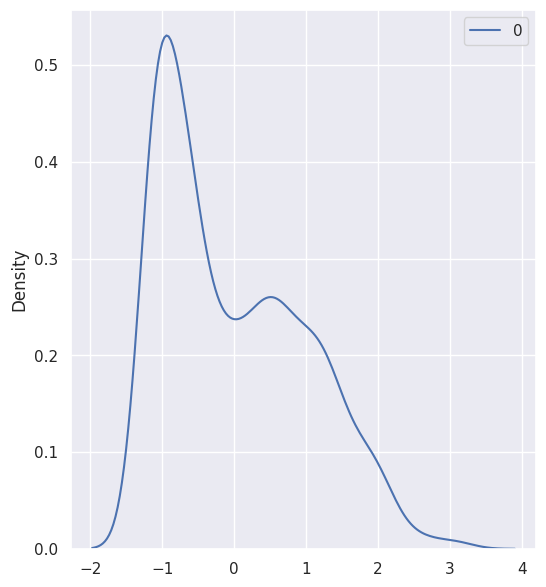

In [ ]:
scaler.fit(y)
scaled_y = scaler.transform(y)
sns.kdeplot(data = scaled_y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.25)

# **Model 1: RandomForests**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
X_train

array([[ 1.69286179,  2.02323613, -1.50212115,  1.68265024,  0.10717837],
       [ 1.36014371, -0.92830834, -0.91001852,  1.01049683,  0.52175826],
       [-0.1522112 , -0.92830834, -1.46057008,  0.50214709, -0.26391401],
       ...,
       [-1.27135384, -0.92830834, -0.35946695, -0.25437021, -1.58177158],
       [-0.2731996 , -0.92830834, -1.46057008,  0.50214709, -0.26391401],
       [-0.78740027, -0.92830834, -1.065835  ,  0.35724384, -1.60806373]])

In [ ]:
y_test

array([[-1.06632036],
       [ 0.69588438],
       [-1.06203484],
       [-0.90261359],
       [-0.74147814],
       [ 1.99268193],
       [-0.99518077],
       [-0.99860918],
       [-0.72690738],
       [ 1.86583062],
       [-0.84090214],
       [-0.22978737],
       [ 1.99611035],
       [-1.07574849],
       [-1.1014616 ],
       [-1.18888615],
       [ 0.14819526],
       [-0.16893302],
       [ 0.98901377],
       [-1.08089111],
       [-1.01403704],
       [-0.15179095],
       [-0.57091455],
       [-1.06289194],
       [ 1.56241599],
       [-0.29749854],
       [ 1.52127503],
       [-0.47320475],
       [ 1.53584578],
       [-1.15460201],
       [-1.17860091],
       [-1.08946215],
       [-0.73804973],
       [ 0.56046203],
       [ 1.21528909],
       [-1.06717746],
       [-1.12888891],
       [ 0.44646727],
       [ 2.56694126],
       [-1.12288918],
       [ 1.33099805],
       [-0.9540398 ],
       [ 0.65731473],
       [ 1.07729543],
       [-0.24350102],
       [ 0

In [ ]:
#Hyperparameters
n_estimators=[int(x) for x in np.linspace(start = 100, stop=1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
#Randomised Search CV
n_estimators= [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose = 2, random_state = 42, n_jobs=1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

**Predictions and Goodness of fit**

In [ ]:
predictions = rf_random.predict(X_test)

In [ ]:
predictions

array([-1.0015199 ,  0.47402315, -1.04598434, -0.40737598, -0.36008541,
        1.69706609, -0.88169984, -0.97441401, -0.48026814,  1.75753103,
       -0.90884045,  0.01187124,  1.87551932, -1.0541512 , -1.06174514,
       -0.95746393,  0.0128162 , -0.43443728,  0.95600757, -1.02811668,
       -0.97781585, -0.44679825, -0.10049883, -1.033567  ,  1.47470688,
       -0.44254645,  0.99056427, -0.5539714 ,  0.82721835, -1.03174566,
       -1.03589661, -0.98711371, -0.77053723,  0.41158316,  1.09624684,
       -1.06657491, -1.01725204,  0.69467449,  1.23196989, -1.03416226,
        0.69703761, -0.83571474,  0.09436317,  0.87209286, -0.32970453,
        0.77712408, -0.13811792,  0.93417629,  1.47896797, -0.30657955,
        0.75910691, -0.89181066, -0.57007109,  0.4272073 , -0.34706822,
        0.38143455, -1.15610023, -1.02862002,  0.52773268, -0.37063947,
        1.04072539, -0.94148353,  1.06631486, -1.09204203, -1.04290257,
       -0.33394772,  1.01181246,  0.3417378 ,  1.67803496, -0.80

<ipython-input-42-f73d90a72b95>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: ylabel='Density'>

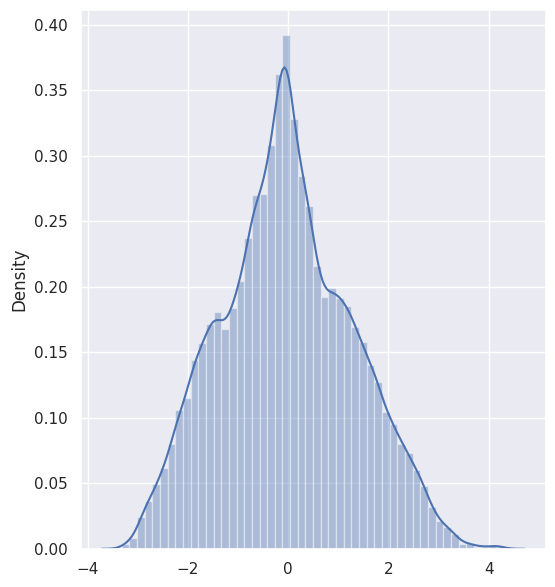

In [ ]:
sns.distplot(y_test-predictions)

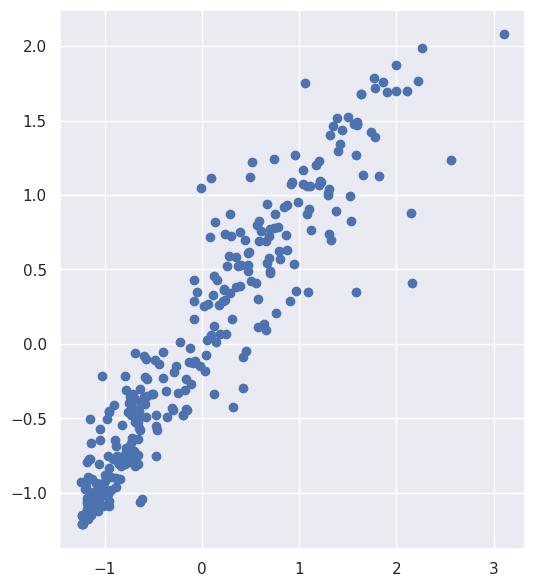

In [ ]:
plt.scatter(y_test, predictions)

In [ ]:
mse = mean_squared_error(y_test, predictions)
mse

0.10955943168734299

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.8855406096371584

# **Model 2:Custom GBNN**

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 13.8 MB/s eta 0:00:00


In [ ]:
input_dim = X_train.shape[1]

In [ ]:
from kerastuner import HyperModel, RandomSearch
from keras.models import Sequential
from keras.layers import Dense

<ipython-input-49-c9101c98871b>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel, RandomSearch


In [ ]:
#Defining a custom HyperModel class
class MyHyperModel(HyperModel):
  def build(self,hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32), activation='relu', input_dim=input_dim))
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
hypermodel = MyHyperModel()

In [ ]:
tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='my_directory',
    project_name='my_project'
)
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Trial 10 Complete [00h 00m 04s]
val_loss: 0.34370145201683044

Best val_loss So Far: 0.3333539664745331
Total elapsed time: 00h 00m 58s


In [ ]:
best_hyperparameters = tuner.get_best_hyperparameters()[0]
best_model = tuner.hypermodel.build(best_hyperparameters)

In [ ]:
best_model.fit(X_train, y_train, epochs=10, batch_size = 32, validation_data=(X_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 7ms/step - loss: 0.4734 - val_loss: 0.4070
Epoch 2/10
30/30 [==============================] - 0s 4ms/step - loss: 0.3634 - val_loss: 0.3899
Epoch 3/10
30/30 [==============================] - 0s 4ms/step - loss: 0.3512 - val_loss: 0.3827
Epoch 4/10
30/30 [==============================] - 0s 4ms/step - loss: 0.3246 - val_loss: 0.3568
Epoch 5/10
30/30 [==============================] - 0s 4ms/step - loss: 0.3205 - val_loss: 0.3686
Epoch 6/10
30/30 [==============================] - 0s 4ms/step - loss: 0.3110 - val_loss: 0.3517
Epoch 7/10
30/30 [==============================] - 0s 4ms/step - loss: 0.2997 - val_loss: 0.3589
Epoch 8/10
30/30 [==============================] - 0s 5ms/step - loss: 0.2898 - val_loss: 0.3382
Epoch 9/10
30/30 [==============================] - 0s 4ms/step - loss: 0.2934 - val_loss: 0.3508
Epoch 10/10
30/30 [==============================] - 0s 4ms/step - loss: 0.2847 - val_loss: 0.3494


In [ ]:
mse = best_model.evaluate(X_test, y_test)
print(mse)

5/5 [==============================] - 0s 3ms/step - loss: 0.2515
0.25148260593414307


In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
gbnn_model = XGBRegressor(
    objective='reg:squarederror',
    booster='gbtree',
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    tree_method='gpu_hist',
    base_score=0.5,
    base_estimator=best_model
)

In [ ]:
gbnn_model.fit(X_train, y_train)

XGBRegressor(base_estimator=<keras.engine.sequential.Sequential object at 0x7f38d3ab7790>,
             base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [ ]:
y_pred = gbnn_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.06641905798960024


<ipython-input-61-f7d4a70d285b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: ylabel='Density'>

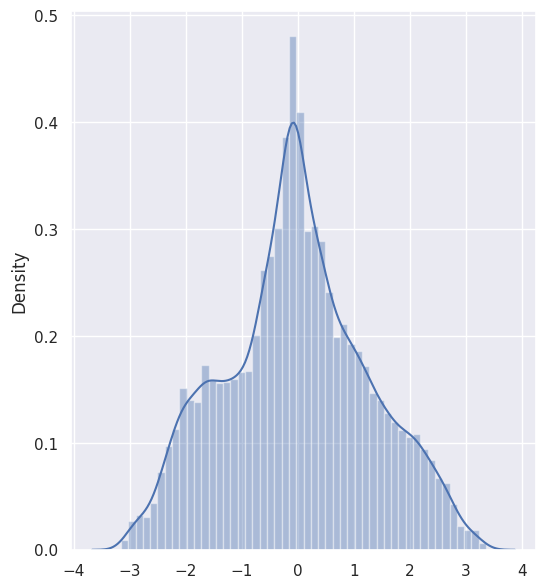

In [ ]:
sns.distplot(y_test-y_pred)

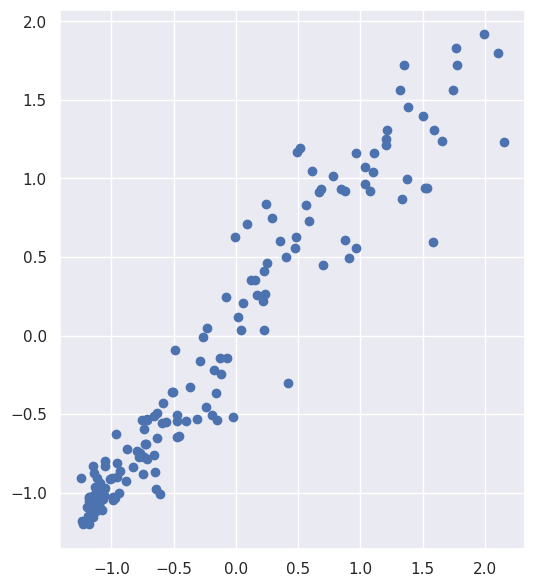

In [ ]:
plt.scatter(y_test, y_pred)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9235985743492485

In [ ]:
from tensorflow.keras.utils import plot_model

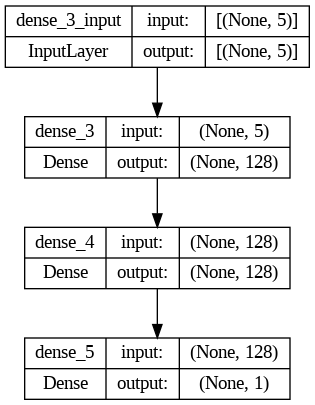

In [ ]:
plot_model(best_model, to_file='model_architecture.png', show_shapes=True)

In [ ]:
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               768       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________
